## Car accident forecasting

It is necessary to create a system that could assess the risk of an accident along the chosen route.
Risk is the probability of an accident with any damage to the vehicle.
Once a driver has booked a car, got behind the wheel, and chosen a route, the system must assess the level of risk.
If the risk level is high, the driver will see a warning and route recommendations.

**Current task** is to understand whether it is possible to predict accidents based on historical data from one of the regions.

**The idea of solving the problem from the customer:**

   1. Create an accident prediction model (target value is **at_fault** in the **parties** table)
         - For the model, select the type of culprit - only car (**car**).
         - Select cases where the accident resulted in any damage to the vehicle, except for the **SCRATCH** type (scratch).
         - For modeling, limit yourself to data for **2012** - they are the most recent.
         - A prerequisite is to take into account the factor of the age of the car.
   2. Based on the model, explore the main factors of an accident
   3. Understand whether the results of modeling and analysis of the importance of factors will help answer the questions:
         - Is it possible to create an adequate driver risk assessment system when issuing a car?
         - What other factors should be taken into account?
         - Do we need to equip the car with any sensors or a camera?

**ER - diagram**

<div>
   
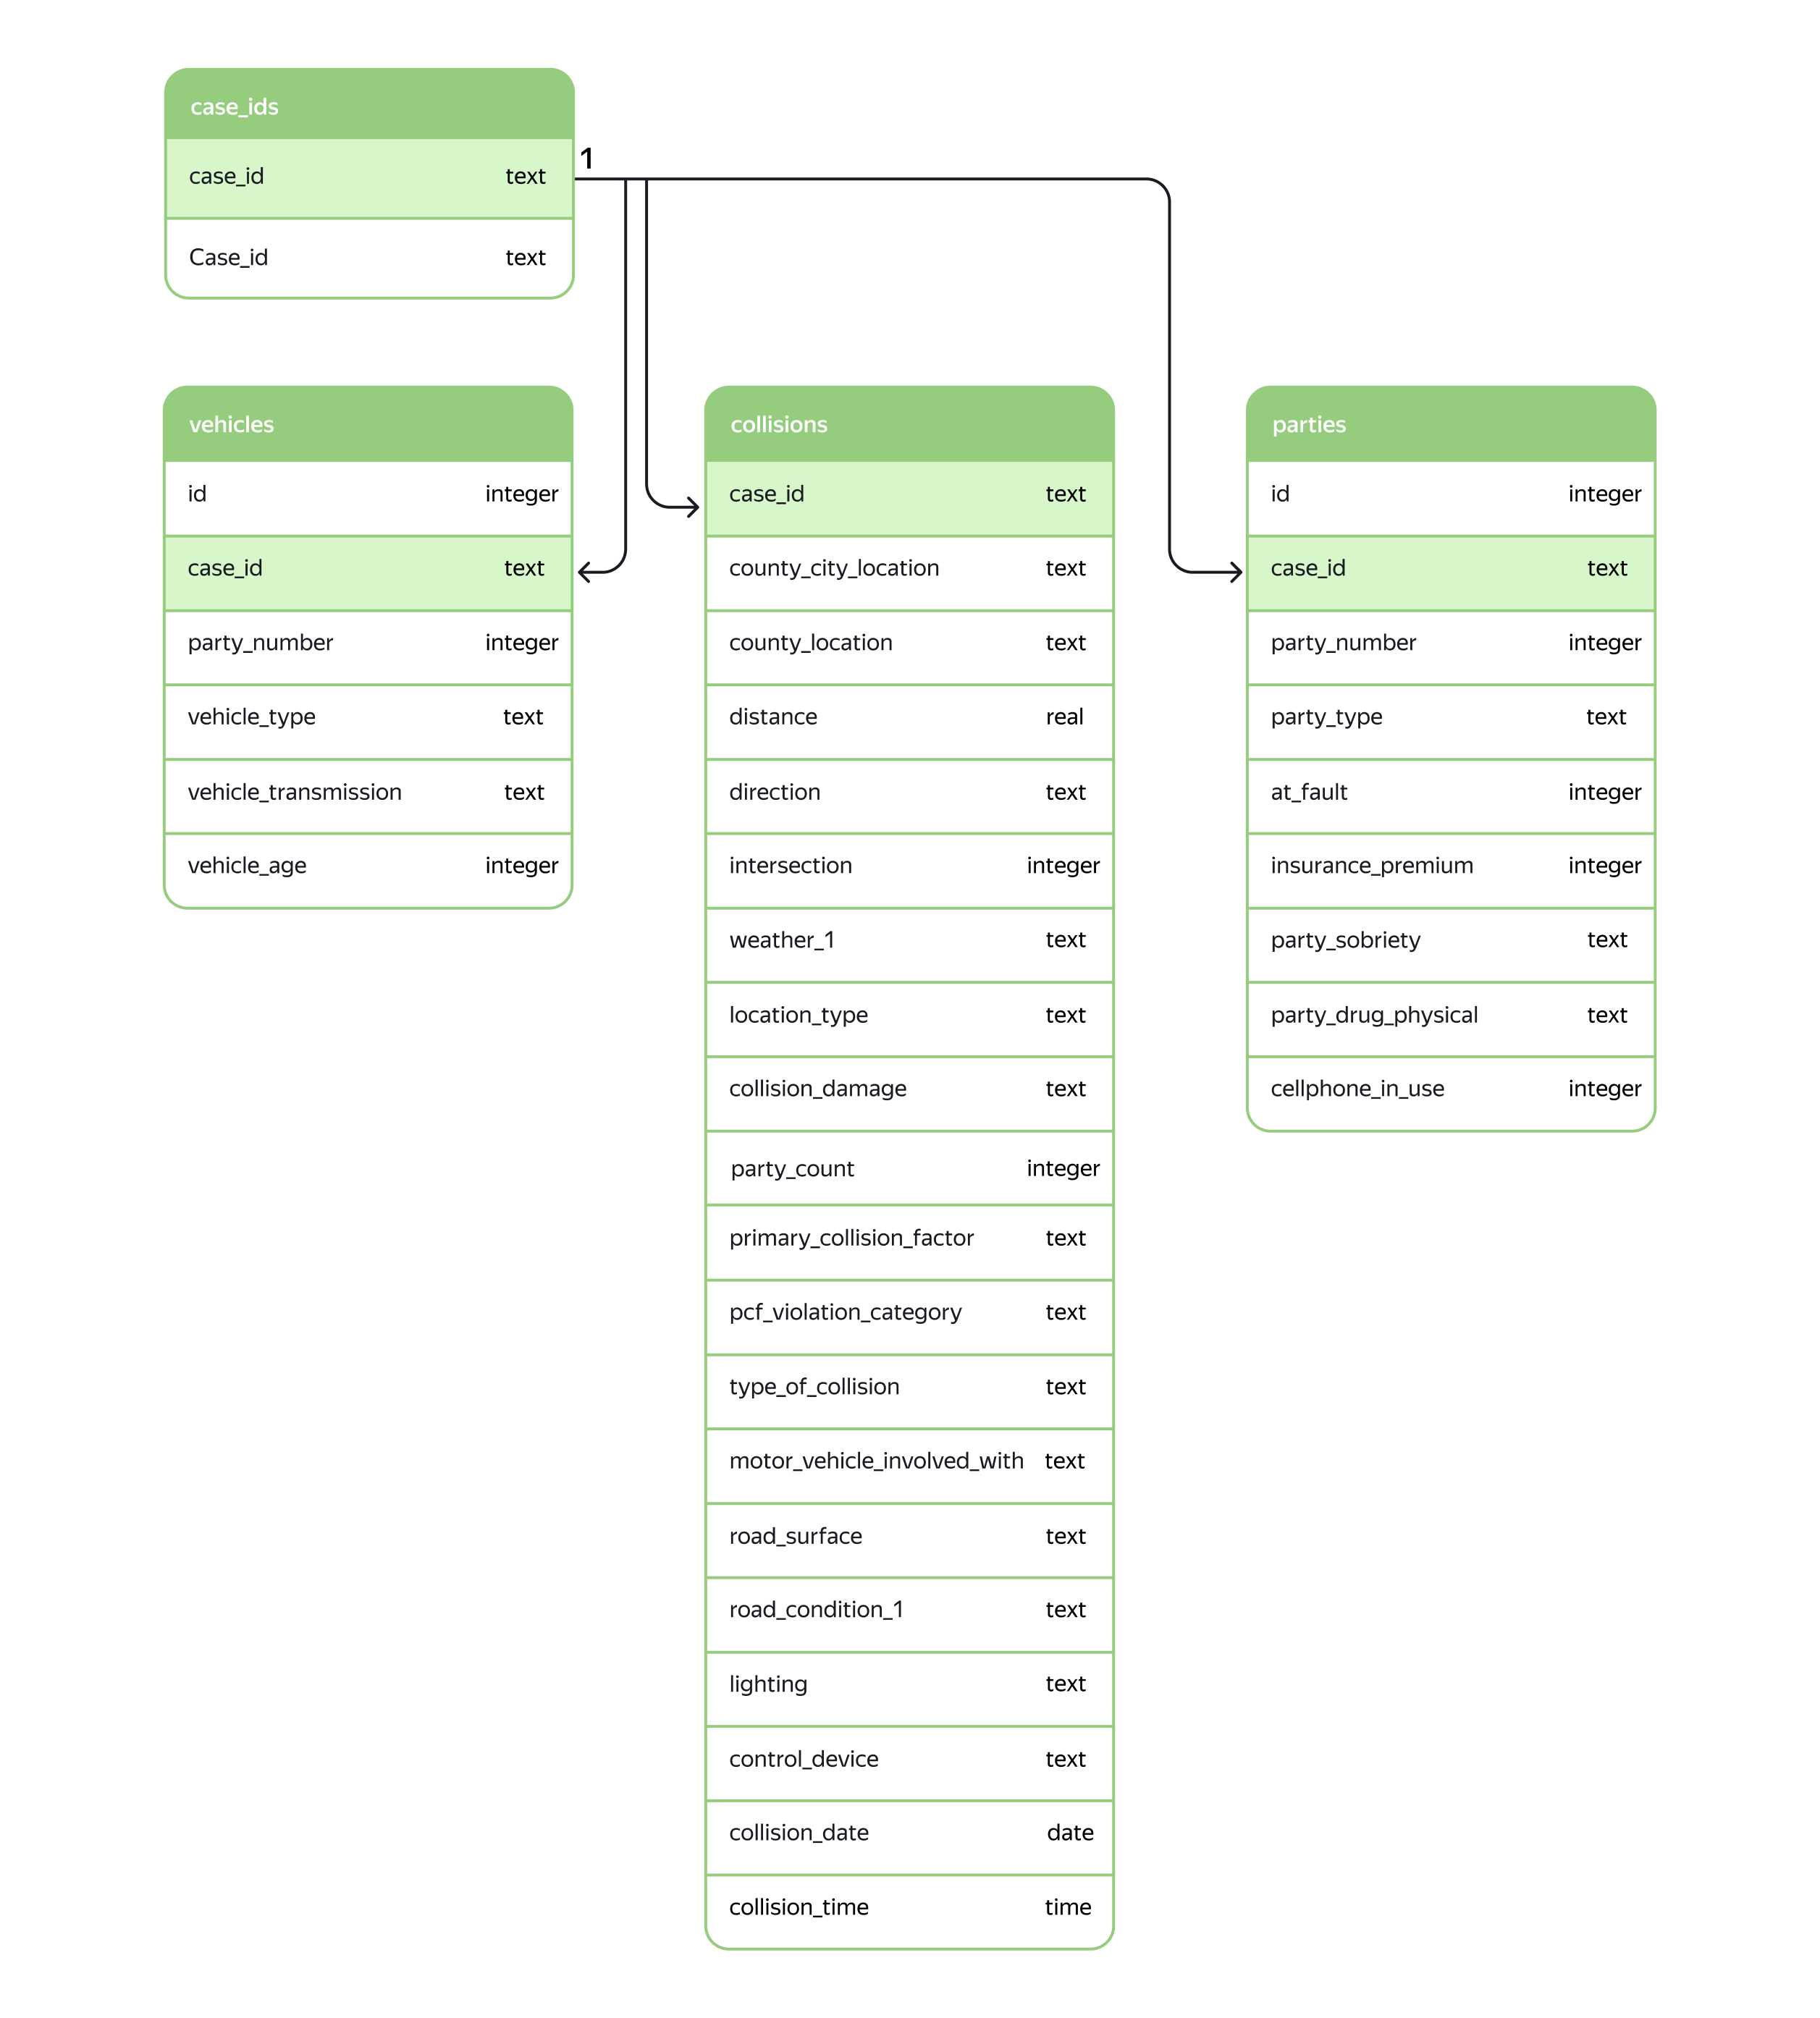
    
 </div>

**Brief description of tables**

**collisions** — general information about the accident
    - Has a unique case_id.
    - This table describes general information about accidents. For example, where did it happen and when.

**parties** — information about participants in the accident
    - Has a non-unique case_id that maps to the corresponding collision in the collisions table.
    - Each line here describes one of the parties involved in the accident.
    - If two cars collided, there should be two rows in this table with matching case_id.
    - If you need a unique ID, it's case_id and party_number.

**vehicles** - information about affected vehicles
    - Has non-unique case_id and non-unique party_number that map to the collisions table and the parties table.
    - If you need a unique ID, it's case_id and party_number.

**Full description of tables**

**collisions (information about incidents)**

- **CASE_ID** - Identification Number in the database. The unique number for the reported incident in the incident table.
- **COLLISION_DATE** - Date of incident. Format year/month/day
- **COLLISION_TIME** - Time of the incident. Format: 24 hour
- **INTERSECTION**		
     - Y — Intersection
	 - N — Not Intersection
	 -  — Not stated
- **WEATHER_1**		
     - A — Clear
	 - B — Cloudy
	 - C — Raining
	 - D — Snowing
	 - E — Fog
	 - F — Other
	 - G — Wind
	 - — Not Stated
- **COLLISION_DAMAGE**	
     - 1 — FATAL ТС
	 - 2 — SEVERE DAMAGE
	 - 3 — MIDDLE DAMAGE
	 - 4 — SMALL DAMAGE
	 - 0 – SCRATCH
- **PRIMARY_COLL_FACTOR**	
     - A — Code Violation
	 - B — Other Improper Driving
	 - C — Other Than Driver
	 - D — Unknown
	 - E — Fell Asleep
	 -  — Not Stated
- **ROAD_SURFACE**
     - A — Dry
	 - B — Wet
	 - C — Snowy or Icy
	 - D — Slippery (Muddy, Oily, etc.)
	 - — Not Stated
- **LIGHTING**
     - A — Daylight
	 - B — Dusk-Dawn
	 - C — Dark-Street Lights
	 - D — Dark-No Street Lights
	 - E — Dark-Street Lights Not Functioning
	 - — Not Stated
- **COUNTY_CITY_LOCATION**		

- **COUNTY_LOCATION**

- **DIRECTION**		
     - N — North
	 - E — East
	 - S — South
	 - W — West
     — Not State

- **DISTANCE** - Distance from main road (meters)		
- **LOCATION_TYPE** 
    - H — Highway
	- I — Intersection
	- R — Ramp (or Collector)
	- or blank — Not State Highway
- **PARTY_COUNT** 	
- **PCF_VIOLATION_CATEGORY**	
     - 01 — Driving or Bicycling Under the Influence of Alcohol or Drug
	 - 02 — Impeding Traffic
	 - 03 — Unsafe Speed
	 - 04 — Following Too Closely
	 - 05 — Wrong Side of Road
	 - 06 — Improper Passing
	 - 07 — Unsafe Lane Change
	 - 08 — Improper Turning
	 - 09 — Automobile Right of Way
	 - 10 — Pedestrian Right of Way
	 - 11 — Pedestrian Violation
	 - 12 — Traffic Signals and Signs
	 - 13 — Hazardous Parking
	 - 14 — Lights
	 - 15 — Brakes
	 - 16 — Other Equipment
	 - 17 — Other Hazardous Violation
	 - 18 — Other Than Driver (or Pedestrian)
	 - 19 — Speeding
	 - 20 — Pedestrian dui
	 - 21 — Unsafe Starting or Backing
	 - 22 — Other Improper Driving
	 - 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug 
	 - 24 — Fell Asleep
	 - 00 — Unknown
	 - — Not Stated
- **TYPE_OF_COLLISION**	
     - A — Head-On
	 - B — Sideswipe
	 - C — Rear End
	 - D — Broadside
	 - E — Hit Object
	 - F — Overturned
	 - G — Vehicle
	 - H — Other
	 - — Not Stated
- **MOTOR_VEHICLE_INVOLVED_WITH**	
     - Other motor vehicle
	 - Fixed object
	 - Parked motor vehicle
	 - Pedestrian
	 - Bicycle
	 - Non-collision
	 - Other object
	 - Motor vehicle on other roadway
	 - Animal
	 - Train
- **ROAD_CONDITION_1**		
     - A — Holes, Deep Ruts
	 - B — Loose Material on Roadway
	 - C — Obstruction on Roadway
	 - D — Construction or Repair Zone
	 - E — Reduced Roadway Width
	 - F — Flooded
	 - G — Other
	 - H — No Unusual
	 -  — Not Stated
- **CONTROL_DEVICE**
     - A — Functioning
	 - B — Not Functioning
	 - C — Obscured
	 - D — None
	 - — Not Stated

**parties (description of car accident participants)**

- **СASE_ID** - Identification number in the database. The unique number for the reported incident in the incident table.
- **PARTY_NUMBER** - Event participant number. From 1 to N - according to the number of participants in the incident
- **PARTY_TYPE**
     - 1 — Car 
	 - 2 — Road bumper
	 - 3 — Building 
	 - 4 — Road signs
	 - 5 — Other
	 - 6 — Operator
	 - — Not Stated 
- **AT_FAULT** - 0/1
- **INSURANCE_PREMIUM** - thsd. USD
- **PARTY_DRUG_PHYSICAL** 
     - E — Under Drug Influence
	 - F — Impairment — Physical
	 - G — Impairment Unknown
	 - H — Not Applicable
	 - I — Sleepy/Fatigued
	 - — Not Stated
- **PARTY_SOBRIETY**
     - A — Had Not Been Drinking
	 - B — Had Been Drinking, Under Influence
	 - C — Had Been Drinking, Not Under Influence
	 - D — Had Been Drinking, Impairment Unknown
	 - G — Impairment Unknown
	 - H — Not Applicable
	 - — Not Stated
- **CELLPHONE_IN_USE** - 0/1

**vehicles**

- **CASE_ID** - Identification number in the database. The unique number for the reported incident in the incident table.
- **VEHICLE_TYPE** - Body type
    - MINIVAN
    - COUPE
    - SEDAN
    - HATCHBACK
    - OTHER
- **VEHICLE_TRANSMISSION** - Gearbox type
    - auto (Automatic)
    - manual (Manual)
    - — Not Stated
- **VEHICLE_AGE** - Vehicle age (in years)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sqlalchemy import create_engine 
from catboost import Pool, CatBoostClassifier, cv
from catboost.utils import get_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Database connection. Loading sql tables

In [2]:
db_config = {
'user': 'praktikum_student', 
'pwd': 'Sdf4$2;d-d30pp', 
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
'port': 6432, 
'db': 'data-science-vehicle-db'
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Create a connection

In [3]:
engine = create_engine(connection_string) 

Database query example

`sample_df` is a pandas dataframe.

In [4]:
query = '''
SELECT table_name FROM information_schema.tables 
'''
sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df.head(4)

,table_name
0,case_ids
1,collisions
2,parties
3,vehicles


***Additionally***
Save tables from the database in its default form

In [6]:
lst = ['case_ids','collisions','parties','vehicles']

```Python
for i in lst:
    query = '''SELECT * FROM {}'''.format(i)
    sample_df = pd.read_sql_query(query, con=engine) 
    sample_df.to_csv('{}.csv'.format(i))
    print('table {} has been saved'.format(i))
```

**Conclusion**
- set up database connection
- found in the database with the names specified in the condition

## Primary Data Review

In [7]:
for i in lst:
    query = '''SELECT * FROM {} LIMIT 5'''.format(i)
    sample_df = pd.read_sql_query(query, con=engine) 
    display(sample_df)

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


In [8]:
for i in lst:
    query = '''SELECT count(*) as cnt FROM {}'''.format(i)
    sample_df = pd.read_sql_query(query, con=engine) 
    print('Number of rows in table {} - {}'.format(i, list(sample_df['cnt'])[0]))

Number of rows in table case_ids - 1400000
Number of rows in table collisions - 1400000
Number of rows in table parties - 2752408
Number of rows in table vehicles - 1021234


**Conclusion:**
   - the database really has all 4 tables specified in the condition (on the ER diagram)
   - all 4 have data (we also checked the number of rows in the tables)
   - to merge all 4 we can use the key **case_id** - it is specified in the condition and is also in the tables

## Statistical analysis of accident factors

1. Find out which months have the most accidents. Analyze the entire observation period (collisions table)
    
      - Create sql query
      - Build a graph
      - make a conclusion


2. The first meeting of your working group will be held soon. For a discussion to be constructive, every employee needs to understand the data. To do this, you must create suitable analytical tasks and assign their solution to colleagues.
    
     2.1. Create at least six tasks for colleagues. Rely on examples and tables.
     2.2. Write down the order of solution for two problems from the list. A prerequisite is that the solution of these problems must include a connection of at least 2 tables.

**1. Months with the most accidents**

Let's look at the whole period:

In [9]:
query = '''
select 
  extract(month from  a.collision_date) as coll_mnth_dig,
  to_char(a.collision_date, 'mon') as coll_mnth_nm,
  count(distinct a.case_id) as coll_cnt
from collisions a
group by 
  extract(month from  a.collision_date),
  to_char(a.collision_date, 'mon') 
order by extract(month from  a.collision_date) asc

 '''
sample_df = pd.read_sql_query(query, con=engine) 
sample_df.head(3)

,coll_mnth_dig,coll_mnth_nm,coll_cnt
0,1.0,jan,132044
1,2.0,feb,128858
2,3.0,mar,139581


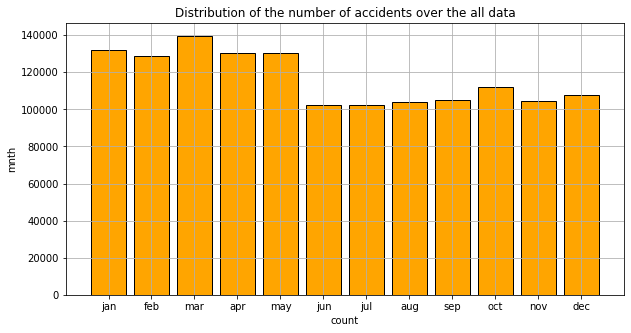

In [10]:
plt.figure(figsize = (10, 5))

plt.bar(sample_df['coll_mnth_nm'], sample_df['coll_cnt'], color = 'orange', edgecolor= 'black')
plt.title('Distribution of the number of accidents over the all data')

plt.xlabel('count')
plt.ylabel('mnth')
plt.grid(True)

plt.show()

We see an increase in the number of events in January - May

Let's look at the distribution over the years:

In [11]:
query = '''
select 
  to_char(date_trunc('Month', a.collision_date), 'YYYY-MM-dd') as coll_mnth_dtm,
  cast(extract(year from  a.collision_date) as text) as coll_year,
  cast(extract(month from  a.collision_date) as text) as coll_mnth_dig,
  to_char(a.collision_date, 'mon') as coll_mnth_nm,
  count(distinct a.case_id) as coll_cnt
from collisions a
group by 
  to_char(date_trunc('Month', a.collision_date), 'YYYY-MM-dd'),
  cast(extract(year from a.collision_date) as text),
  cast(extract(month from  a.collision_date) as text),
  to_char(a.collision_date, 'mon')

 '''
sample_df = pd.read_sql_query(query, con=engine) 
sample_df.head(3)

,coll_mnth_dtm,coll_year,coll_mnth_dig,coll_mnth_nm,coll_cnt
0,2009-01-01,2009,1,jan,35062
1,2009-02-01,2009,2,feb,34480
2,2009-03-01,2009,3,mar,36648


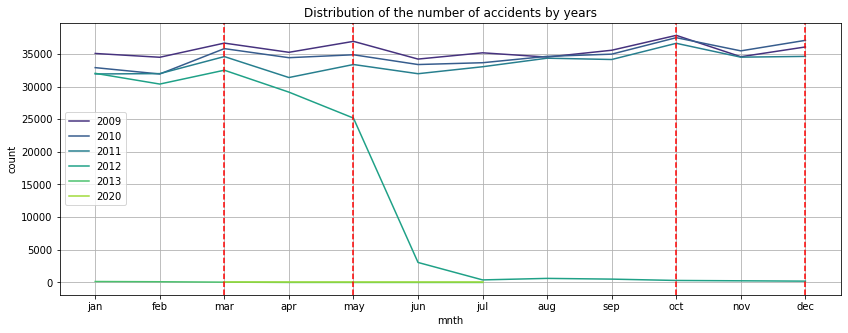

In [12]:
fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.lineplot(data = sample_df, x = 'coll_mnth_nm', y = 'coll_cnt',
                  hue = 'coll_year', palette = 'viridis')

ax.axvline(x = 'mar', color='r', ls = '--')
ax.axvline(x = 'may', color='r', ls = '--')
ax.axvline(x = 'oct', color='r', ls = '--')
ax.axvline(x = 'dec', color='r', ls = '--')

ax.set_ylabel('count')
ax.set_xlabel('mnth')

ax.set_title('Distribution of the number of accidents by years')
ax.grid()
ax.legend()

plt.show()

Our initial observation was biased as data for 2012 is only available for half a year.
It is they who give an increase in January - May and shift the picture (in the modeling problem, we will consider 2012 separately).
Among the "dangerous" months, I would single out: `March, May, October, December`

**2. Questions for colleagues**

We need to come up with 6 problems (based on examples) and solve 2 of them.

1. Assess the severity of the accident **`COLLISION_DAMAGE`** depending on the sobriety of the participant in the accident **`PARTY_SOBRIETY`** + add a breakdown of guilty / not guilty **`AT_FAULT`** (tables **`parties`** and * *`collisions`**)
2. Cars of what type **`VEHICLE_TYPE`** are most often involved in road accidents. What types of violation for them are the causes of crashes **`PRIMARY_COLL_FACTOR`** (tables **`vehicles`** and **`collisions`**)
3. How are the quality of the road surface **`ROAD_SURFACE`** and the type of gearbox of the car involved in the accident **`VEHICLE_TRANSMISSION`** related. The output is a table with the number of traffic accidents by type of coverage and columns - type of gearbox (tables **`vehicles`** and **`collisions`**)
4. Depending on the type of fault of the participant in the accident **`AT_FAULT`** output: body type **`VEHICLE_TYPE`** and average age of the car **`VEHICLE_AGE`** (tables **`parties`** and ** `vehicles`**)
5. How the type of road **`LOCATION_TYPE`** and the type of participant in the incident **`PARTY_TYPE`** are related. Display the top 3 members for each type. (tables **`parties`** and **`collisions`**)
6. Again consider the severity of the accident **`COLLISION_DAMAGE`**, but now depending on the average age of the car **`VEHICLE_AGE`** and the average amount of insurance **`INSURANCE_PREMIUM`** (tables **`vehicles`**, **`parties`**, **`collisions`**)

1. Assess the severity of the accident **`COLLISION_DAMAGE`** depending on the sobriety of the participant in the accident **`PARTY_SOBRIETY`** + add a breakdown of guilty / not guilty **`AT_FAULT`** (tables **`parties`** and * *`collisions`**)

In [13]:
query = '''
with tmp as 
(
select 
  a.collision_damage,
  b.party_sobriety,
  sum(case when b.at_fault = 1 then 1 else 0 end) as is_fault,
  sum(case when b.at_fault = 0 then 1 else 0 end) as not_fault,
  round(avg(a.party_count),1) as cnt_persns,
  sum(case when b.at_fault = 1 then 1 else 0 end) + sum(case when b.at_fault = 0 then 1 else 0 end) as cnt_all
from collisions a

left join parties b
  on a.case_id = b.case_id
  
where 1=1
  ---and a.collision_damage = 'fatal'
group by 
   a.collision_damage,
   b.party_sobriety
),

tmp_end as (
select 
 a.*,
 round(a.is_fault * 100/a.cnt_all, 1) as share_is_fault,
 round(a.not_fault * 100/a.cnt_all, 1) as share_not_fault,
 sum(a.cnt_all) over(partition by a.collision_damage) as sum_coll_grp,
 round(a.cnt_all * 100/sum(a.cnt_all) over(partition by a.collision_damage),1) as share_coll_grp,
 row_number() over(partition by a.collision_damage order by round(a.is_fault * 100/a.cnt_all, 1) desc) as n
from tmp a 

order by  a.collision_damage, round(a.is_fault * 100/a.cnt_all, 1) desc
)

select 
  a.* 
from tmp_end a 
where 1=1
  and a.n = 1
  ----and a.n < 10

 '''
sample_df = pd.read_sql_query(query, con=engine) 
sample_df.head(100)

,collision_damage,party_sobriety,is_fault,not_fault,cnt_persns,cnt_all,share_is_fault,share_not_fault,sum_coll_grp,share_coll_grp,n
0,fatal,"had been drinking, under influence",3174,507,1.8,3681,86.0,13.0,19954.0,18.4,1
1,middle damage,"had been drinking, under influence",20905,1292,1.7,22197,94.0,5.0,315932.0,7.0,1
2,scratch,"had been drinking, under influence",15245,1217,2.0,16462,92.0,7.0,734188.0,2.2,1
3,severe damage,"had been drinking, under influence",5637,464,1.7,6101,92.0,7.0,56335.0,10.8,1
4,small damage,"had been drinking, under influence",60985,2987,1.7,63972,95.0,4.0,1625999.0,3.9,1


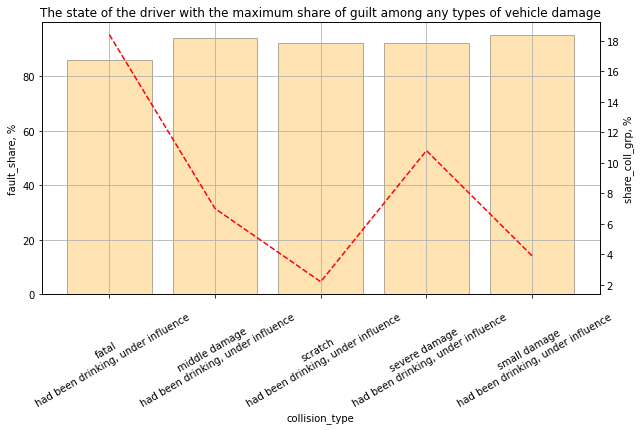

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()


ax.bar(sample_df['collision_damage'] + '\n' + sample_df['party_sobriety'], 
                          sample_df['share_is_fault'], color = 'orange', edgecolor= 'black',  alpha = 0.3)

ax2.plot(sample_df['collision_damage'] + '\n' + sample_df['party_sobriety'], 
                          sample_df['share_coll_grp'], '--', label = 'share_coll_grp', color = 'red')

ax.set_title('The state of the driver with the maximum share of guilt among any types of vehicle damage')

ax.tick_params(axis = 'x', labelrotation = 30)

ax.set_xlabel('collision_type')
ax.set_ylabel('fault_share, %')
ax2.set_ylabel('share_coll_grp, %')

ax.grid(True)

plt.show()

**Conclusion:**
   - regardless of the severity of the accident, a drunk participant under the influence of alcohol always turns out to be the culprit of an accident more often than all other types of subjects (approximately 80%)
   - at the same time, in fatal road accidents with human casualties, the share of such participants is 20% (without taking into account the degree of guilt), while 80% of drunken participants are guilty of road accidents. For comparison: a sober participant is guilty of 40% of fatal accidents, the proportion of sober participants in fatal accidents is 61.5%
   - it can also be noted that in the case of the severity of the accident "scratch", the proportion of drunken participants is minimal and amounts to 2.2%
   
*Note*
- under the participant of an accident we mean any subject of an accident, not just the driver

3. How are the quality of the road surface **`ROAD_SURFACE`** and the type of gearbox of the car involved in the accident **`VEHICLE_TRANSMISSION`** related. The output is a table with the number of traffic accidents by type of coverage and columns - type of gearbox (tables **`vehicles`** and **`collisions`**)

In [15]:
query = '''
with tmp as
(
select 
  coalesce(a.road_surface, 'unknw') as road_surface,
--- a.location_type,
  sum(case when b.vehicle_transmission = 'auto' then 1 else 0 end) as is_auto,
  sum(case when b.vehicle_transmission = 'manual' then 1 else 0 end) as is_manual,
  sum(case when b.vehicle_transmission is null then 1 else 0 end) as is_smth,
  count(a.case_id) as cnt_all,
  sum(count(a.case_id)) over() as cnt_total

from collisions a

left join vehicles b
  on a.case_id = b.case_id
  
where 1=1

group by 
   coalesce(a.road_surface, 'unknw')
 ---  ,a.location_type
   )
   
 select 
   a.*,
   round(cnt_all * 100/cnt_total, 1) as share_total,
   round(is_auto * 100/cnt_all, 1) as auto_share,
   round(is_manual * 100/cnt_all, 1) as manual_share,
   round(is_smth * 100/cnt_all, 1) as smth_share
  
 from tmp a

 '''

sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,road_surface,is_auto,is_manual,is_smth,cnt_all,cnt_total,share_total,auto_share,manual_share,smth_share
0,dry,450249,445186,554513,1449948,1628592.0,89.0,31.0,30.0,38.0
1,slippery,361,522,626,1509,1628592.0,0.1,23.0,34.0,41.0
2,snowy,2468,2457,3166,8091,1628592.0,0.5,30.0,30.0,39.0
3,unknw,4124,4133,6720,14977,1628592.0,0.9,27.0,27.0,44.0
4,wet,45041,43034,65992,154067,1628592.0,9.5,29.0,27.0,42.0


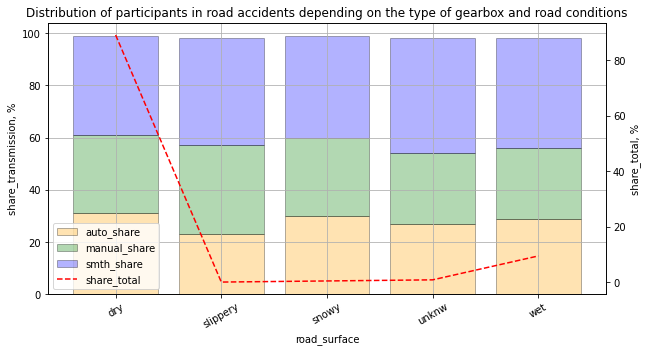

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()


ax.bar(sample_df['road_surface'], sample_df['auto_share'], color = 'orange', 
                             edgecolor= 'black',  alpha = 0.3, label= 'auto_share')

ax.bar(sample_df['road_surface'], sample_df['manual_share'], color = 'green', edgecolor= 'black', 
                                        bottom = sample_df['auto_share'], alpha = 0.3, label= 'manual_share')

ax.bar(sample_df['road_surface'], sample_df['smth_share'], color = 'blue', edgecolor= 'black', 
                            bottom = np.array(sample_df['auto_share']) + 
                                        np.array(sample_df['manual_share']), alpha = 0.3, label= 'smth_share')

ax2.plot(sample_df['road_surface'], sample_df['share_total'], '--',  color = 'red', label = 'share_total')

ax.set_title('Distribution of participants in road accidents depending on the type of gearbox and road conditions')

ax.tick_params(axis = 'x', labelrotation = 30)

ax.set_xlabel('road_surface')
ax.set_ylabel('share_transmission, %')
ax2.set_ylabel('share_total, %')


lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc = 3)


ax.grid(True)

plt.show()

**Conclusion:**
- contrary to expectations, we do not see a strong dependence of the accident rate on the condition of the roadway during an accident, broken down by type of gearbox
- we can note a lower accident rate of cars with automatic transmission during ice - 23% (cars with manual transmission under such conditions get into accidents more often), but the share of such accidents in the total volume is only 0.1%
- the vast majority of accidents occur in dry weather - 89%

## Create a model for car accident forecasting

1. Prepare a data set based on the initial assumption of the customer: 
    - **Preparation of the source table must be done using an sql query**
    - Choose the type of culprit - only car (**car**).
    - Take cases where an accident resulted in any significant damage to the car of any of the participants - everything except the SCRATCH type (scratch).
    - For modeling, we take data only for **2012**
    - A prerequisite is to take into account the factor of the age of the car.
    - Conduct an initial selection of the factors needed for the model.


2. Study the description of the factors. It is necessary to select those that can affect the likelihood of an accident.

3. Conduct a statistical study of the selected factors.

Let's start collecting dataset for training:

In [17]:
query = '''
select 

  b.party_type,
  b.at_fault,
  count(a.case_id) as coll_cnt

from collisions a

inner join parties b
  on a.case_id = b.case_id
   and b.party_type = 'car'
  ---- and b.at_fault = 1

where 1=1
  and extract(year from a.collision_date) = '2012'
  and a.collision_damage != 'scratch'

group by 
  b.party_type,
  b.at_fault

 '''
sample_df = pd.read_sql_query(query, con=engine) 
sample_df.head(50)

,party_type,at_fault,coll_cnt
0,car,0,93790
1,car,1,103047


With the request above, we collected:
   - all accident participants with type != `scratch`
   - for 2012
   - broken down by the degree of guilt in an accident
  
Also, by the condition of the problem, we know that the target feature is **at_fault** in the **parties** table.

The next step is to collect all potentially significant features for this table. There are really a lot of signs, so some of them can be omitted.

**Model usage scenario**

Once a driver has booked a car, got behind the wheel, and chosen a route, the system must assess the level of risk.
If the risk level is high, the driver will see a warning and route recommendations.

**Important to understand**

Based on common sense, we will not be able to use a number of parameters in industrial operation, for example:
    - retrostatistics on the number of participants in the accident
    - the severity of the accident, etc.
   
Since the statistics tell us the story that happened, and based on the business task, we must make a prediction when the service client just got into the car.

Let's carefully write down all possible features and leave comments why we can / can't use them:

- `everything related to the properties of the car`
        
    Everything is simple here, we can control this at the stage of placing an order by the client
    
     - **VEHICLE_TYPE** 
     - **VEHICLE_TRANSMISSION**
     - **VEHICLE_AGE**
     

- `properties of a participant in an accident - here it is already necessary to select features`

     Target feature
   
     - **AT_FAULT** 
    
     We can control these signs at the stage of the order / when the client gets into the car
    
     - **INSURANCE_PREMIUM** 
     - **PARTY_DRUG_PHYSICAL** 
     - **PARTY_SOBRIETY** 
     - **CELLPHONE_IN_USE** 

     These features are unknown to us or do not make sense
  
     - **PARTY_NUMBER** - **this information is unknown to us at the time of order**
     - **PARTY_TYPE** - **we selected cars at the data collection stage**
    
    
- `information about the incident`

Here it is important to separate the general factors / factors preceding the accident and the properties of the accident itself, we cannot use the latter.


- **COLLISION_TIME** - Time of the incident. Format: 24 hour
- **WEATHER_1** - Weather
- **LIGHTING** - Lighting


Route Properties

- **DIRECTION**
- **DISTANCE**
- **ROAD_SURFACE**
- **LOCATION_TYPE**
- **ROAD_CONDITION_1**
- **CONTROL_DEVICE**
- **INTERSECTION**

- **COUNTY_CITY_LOCATION** - **check in EDA stage**
- **COUNTY_LOCATION** - **check in EDA step**

These factors are more related to the description of the accident - we will not be able to use them

- **COLLISION_DAMAGE**
- **PRIMARY_COLL_FACTOR** 
- **PARTY_COUNT** 
- **PCF_VIOLATION_CATEGORY**
- **TYPE_OF_COLLISION** 
- **MOTOR_VEHICLE_INVOLVED_WITH** 

- **COLLISION_DATE** - Date of incident. Format year / month / day - **I propose not to use the date, we have an incomplete year, and all other properties of the conditions on the road are contained in other signs**

In [18]:
query = '''

select 
    a.case_id,
    extract(hour from a.collision_time) as collision_hour, 
    a.weather_1,
    a.lighting,
    
    a.direction,
    a.distance,
    a.road_surface,
    a.location_type, 
    a.road_condition_1,
    a.control_device,
    a.intersection,
    a.county_city_location, 
    a.county_location,
    
    b.at_fault,
    b.insurance_premium,
    b.party_drug_physical,
    b.party_sobriety,
    b.cellphone_in_use,
    
    c.vehicle_type,
    c.vehicle_transmission, 
    c.vehicle_age 

from collisions a

inner join parties b
  on a.case_id = b.case_id
   and b.party_type = 'car'
   
left join vehicles c
  on b.case_id = c.case_id
    and b.party_number = c.party_number
  
where 1=1
  and extract(year from a.collision_date) = '2012'
  and a.collision_damage != 'scratch'


 '''
df = pd.read_sql_query(query, con=engine) 
df.head(3)

,case_id,collision_hour,weather_1,lighting,direction,distance,road_surface,location_type,road_condition_1,control_device,...,county_city_location,county_location,at_fault,insurance_premium,party_drug_physical,party_sobriety,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,5495543,16.0,clear,daylight,south,500.0,dry,highway,normal,none,...,4313,santa clara,0,23.0,None,had not been drinking,0.0,None,None,NaN
1,5496532,12.0,clear,daylight,south,200.0,dry,None,normal,functioning,...,1900,los angeles,0,56.0,None,had not been drinking,0.0,None,None,NaN
2,5556232,15.0,clear,daylight,north,263.0,dry,highway,normal,none,...,3001,orange,1,18.0,None,had not been drinking,0.0,None,None,NaN


**Check**

In [19]:
sample_df

,party_type,at_fault,coll_cnt
0,car,0,93790
1,car,1,103047


In [20]:
df.groupby('at_fault', as_index = False)['case_id'].count()

,at_fault,case_id
0,0,93790
1,1,103047


**We will conduct a statistical study of the selected factors**

Next we can use Pandas

In [21]:
df = df.drop('case_id', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196837 entries, 0 to 196836
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   collision_hour        195464 non-null  float64
 1   weather_1             196183 non-null  object 
 2   lighting              196116 non-null  object 
 3   direction             153975 non-null  object 
 4   distance              196837 non-null  float64
 5   road_surface          195564 non-null  object 
 6   location_type         87357 non-null   object 
 7   road_condition_1      195694 non-null  object 
 8   control_device        195864 non-null  object 
 9   intersection          195850 non-null  float64
 10  county_city_location  196837 non-null  object 
 11  county_location       196837 non-null  object 
 12  at_fault              196837 non-null  int64  
 13  insurance_premium     176607 non-null  float64
 14  party_drug_physical   25148 non-null   object 
 15  

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
collision_hour,195464.0,13.050352,5.409766,0.0,9.0,14.0,17.0,23.0
distance,196837.0,662.478169,7915.264303,0.0,10.0,100.0,500.0,1584000.0
intersection,195850.0,0.201899,0.401419,0.0,0.0,0.0,0.0,1.0
at_fault,196837.0,0.523514,0.499448,0.0,0.0,1.0,1.0,1.0
insurance_premium,176607.0,38.945002,16.230328,0.0,25.0,36.0,50.0,105.0
cellphone_in_use,171464.0,0.023632,0.151899,0.0,0.0,0.0,0.0,1.0
vehicle_age,54554.0,4.856472,3.234503,0.0,3.0,4.0,7.0,161.0


Let's see the share of omissions:

In [23]:
df[df.columns[df.isnull().any()]].isna().mean().to_frame().sort_values(by = [0], ascending = False)

,0
party_drug_physical,0.872239
vehicle_age,0.722847
vehicle_transmission,0.718605
vehicle_type,0.714241
location_type,0.556196
direction,0.217754
cellphone_in_use,0.128904
insurance_premium,0.102775
party_sobriety,0.018416
collision_hour,0.006975


The total proportion of records containing omissions:

In [24]:
(len(df)-len(df.dropna())) * 100/len(df)

99.6941631908635

Check the number of obvious duplicates

In [25]:
df.duplicated().sum()

1344

In [26]:
df = df.drop_duplicates()
df = df.reset_index(drop = True)

In the default sample, we have 20 features of which:
   
   - quantitative features `distance`, `insurance_premium`, `vehicle_age`
   - all others are categorical variables

In [27]:
numerical_cols = ['distance','insurance_premium','vehicle_age']
cat_cols = df.columns[~df.columns.isin(numerical_cols)]

print('Numerical Values {} are : {}'.format(len(numerical_cols), numerical_cols))
print('')
print('Categorical Values {} are : {}'.format(len(cat_cols), cat_cols))

Numerical Values 3 are : ['distance', 'insurance_premium', 'vehicle_age']

Categorical Values 17 are : Index(['collision_hour', 'weather_1', 'lighting', 'direction', 'road_surface',
       'location_type', 'road_condition_1', 'control_device', 'intersection',
       'county_city_location', 'county_location', 'at_fault',
       'party_drug_physical', 'party_sobriety', 'cellphone_in_use',
       'vehicle_type', 'vehicle_transmission'],
      dtype='object')


Let's print unique values as an example:

In [28]:
for i in numerical_cols:
    print(f'Column name: {i}')
    print()
    print((df[i].unique()))
    print('===========================')

Column name: distance

[ 500.  200.  263. ... 2412. 5861. 2620.]
Column name: insurance_premium

[ 23.  56.  18.  53.  37.  28.  nan  57.  21.  25.  26.  42.  39.  44.
  68.  32.  29.  35.  36.  66.  73.  31.  50.  76.  59.  22.  81.  54.
  38.  61.  41.  67.  30.  27.  60.  33.  58.  45.  47.  20.  55.  51.
  24.  52.  62.  43.  17.  49.  48.  19.  63.  46.  65.  82.  79.  40.
  77.  34.  64.  72.  70.  69.  16.  71.  75.  74.  85.  84.  78.  87.
  80.  83.  95.  90.  14.   8.  10.  89.  11.  86.  88.  12.  91.   7.
  93.   0.  15.  94. 100.  92.  13.   5.   6.  99.  96.   9. 105.   4.
   3. 101.  97.   1.  98. 102. 104.   2.]
Column name: vehicle_age

[ nan   4.   3.   0.   6.   2.  12.   5.   9.   8.   7.  10.   1.  11.
  17.  13.  14.  15.  16. 161.  19.]


Strange value of the age of the car in 161 years - fix it

In [29]:
df['vehicle_age'] = np.where(df['vehicle_age'] == 161, 16, df['vehicle_age'])

In [30]:
for i in cat_cols:
    print(i, len(df[i].unique()))

collision_hour 25
weather_1 8
lighting 6
direction 5
road_surface 5
location_type 4
road_condition_1 9
control_device 5
intersection 3
county_city_location 513
county_location 58
at_fault 2
party_drug_physical 6
party_sobriety 7
cellphone_in_use 3
vehicle_type 4
vehicle_transmission 3


I suggest looking at the unique values of quantitative features

In [31]:
for i in cat_cols:
    print(f'Column name: {i}')
    print()
    print((df[i].unique()))
    print('===========================')

Column name: collision_hour

[16. 12. 15.  7. 11. 18.  9.  8. 14. 23. 10. 20. 22. 17.  6. 19.  4. 13.
  5. 21.  1. nan  2.  0.  3.]
Column name: weather_1

['clear' 'cloudy' 'raining' 'fog' None 'snowing' 'other' 'wind']
Column name: lighting

['daylight' 'dark with no street lights' 'dark with street lights'
 'dusk or dawn' 'dark with street lights not functioning' None]
Column name: direction

['south' 'north' None 'west' 'east']
Column name: road_surface

['dry' None 'wet' 'snowy' 'slippery']
Column name: location_type

['highway' None 'intersection' 'ramp']
Column name: road_condition_1

['normal' 'holes' 'construction' 'other' None 'obstruction'
 'reduced width' 'loose material' 'flooded']
Column name: control_device

['none' 'functioning' None 'obscured' 'not functioning']
Column name: intersection

[ 0.  1. nan]
Column name: county_city_location

['4313' '1900' '3001' '1942' '3015' '1932' '1954' '1985' '4311' '1955'
 '3782' '0792' '1959' '3343' '4400' '1928' '3300' '3705' '2700'

The attribute `party_drug_physical` contains the value G - fix it

In [32]:
df['party_drug_physical'] = np.where(df['party_drug_physical'] == 'G', 
                                           'impairment unknown', df['party_drug_physical'])

CPU times: user 67.5 ms, sys: 6.41 ms, total: 73.9 ms
Wall time: 71.4 ms


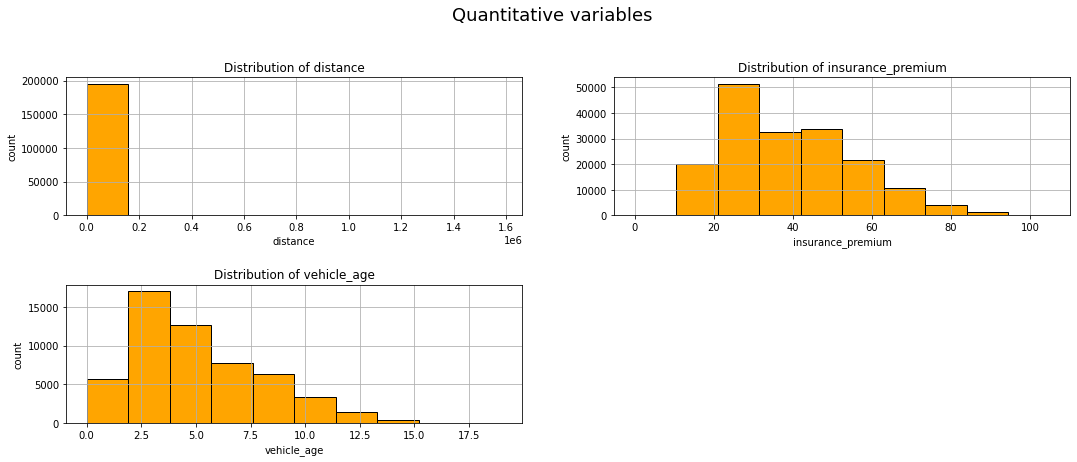

In [33]:
%%time


plt.figure(figsize = (18, 14))
plt.subplots_adjust(hspace = 0.5)
plt.suptitle("Quantitative variables", fontsize = 18, y = 0.95)

for n, ct in enumerate(numerical_cols):
    ax = plt.subplot(4, 2, n + 1)
    ax = plt.hist(df[ct], color = 'orange', edgecolor= 'black')
    plt.title(f'Distribution of {ct}')
    plt.xlabel(ct)
    plt.ylabel('count')
    plt.grid(True)

CPU times: user 2.79 s, sys: 22.8 ms, total: 2.82 s
Wall time: 2.82 s


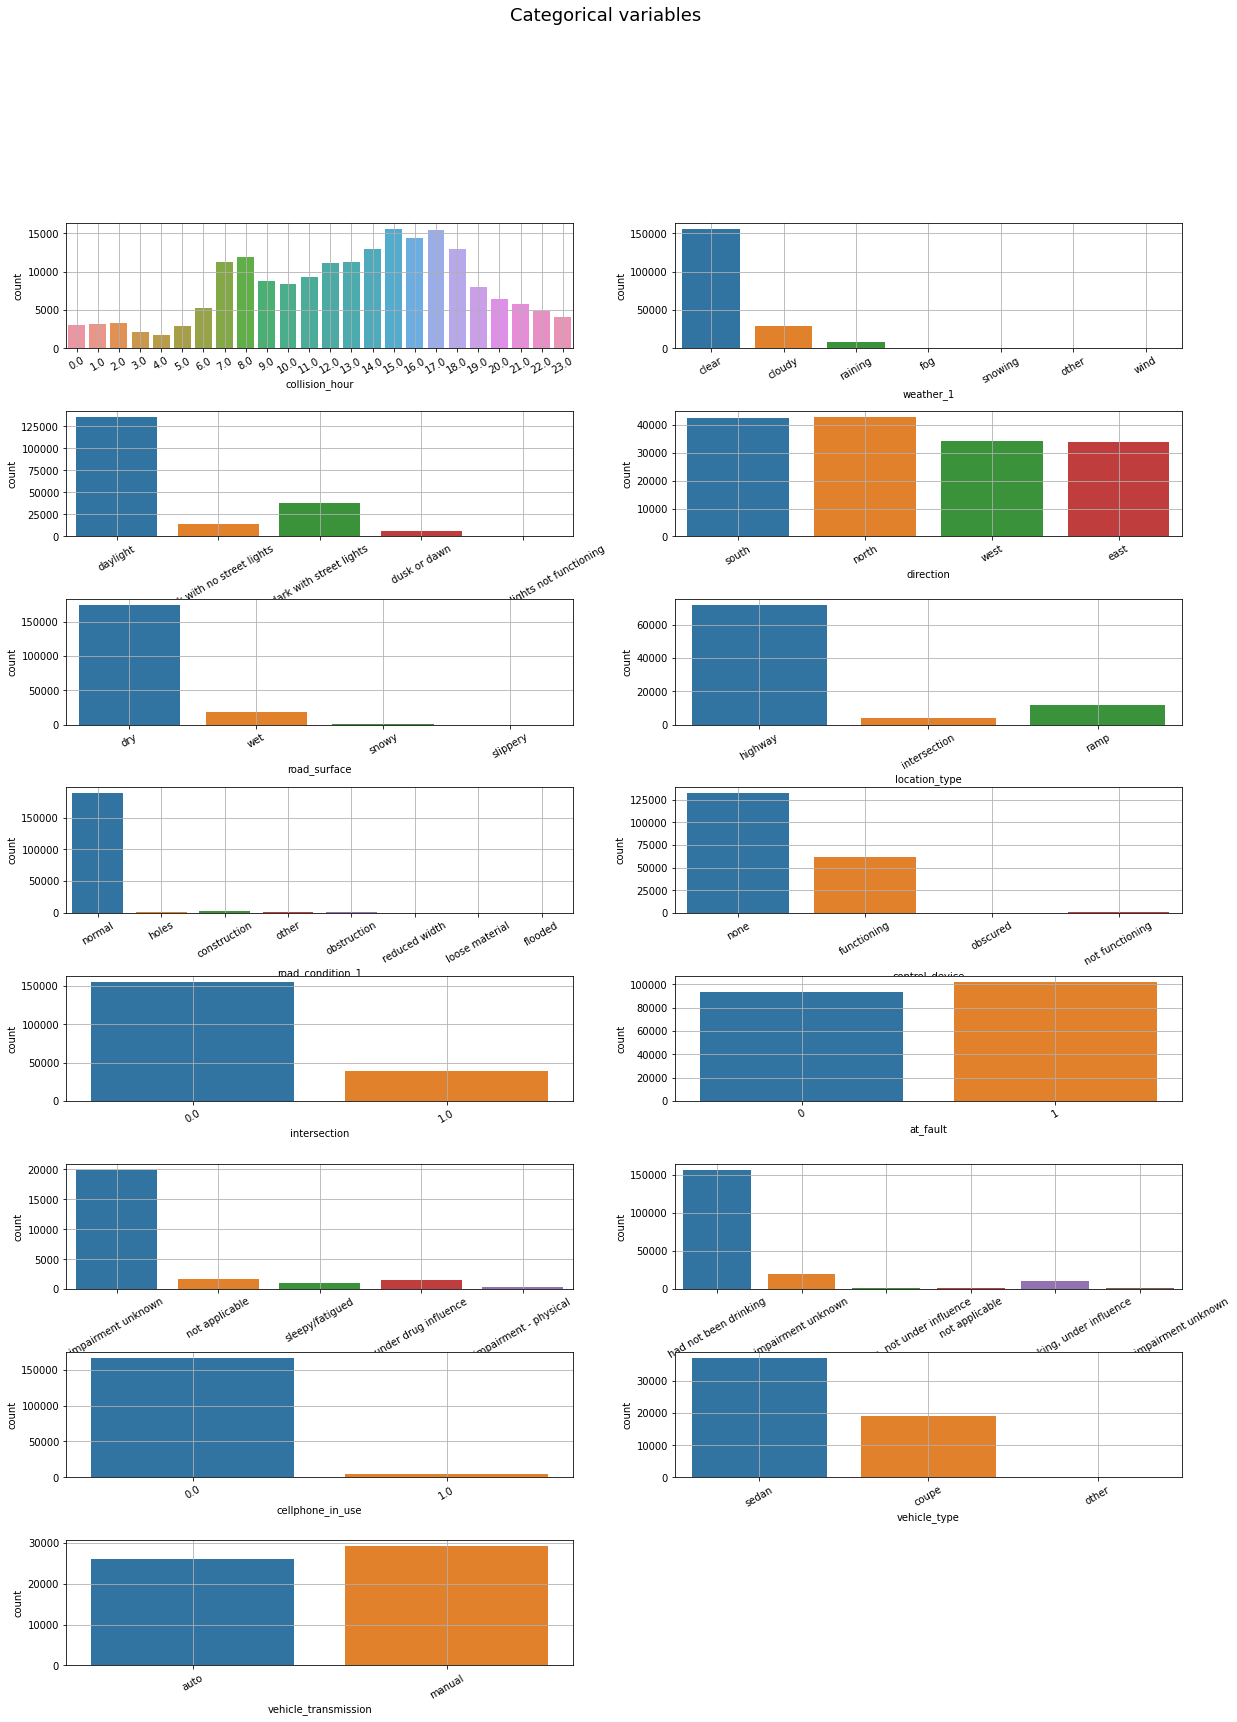

In [34]:
%%time

cat_cols_1 = [x for x in cat_cols if x != 'county_city_location' and x != 'county_location']

plt.figure(figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5)
plt.suptitle("Categorical variables", fontsize = 18)

for n, ct in enumerate(cat_cols_1):
    ax = plt.subplot(9, 2, n + 1)
    sns.countplot(x = df[ct], ax = ax)
    ax.tick_params(axis = 'x', labelrotation = 30)
    plt.grid(True)

**Build a correlation matrix**

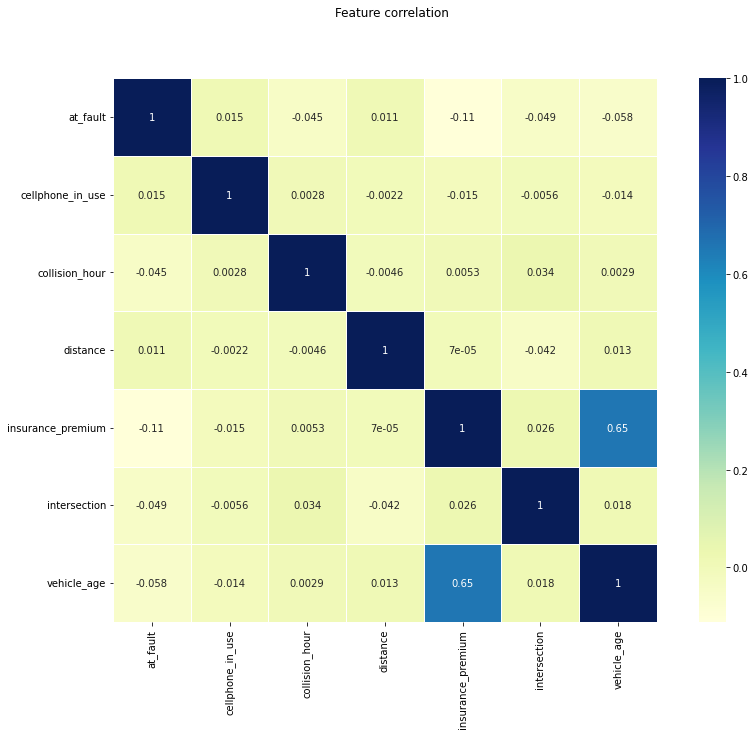

In [35]:
fig, ax = plt.subplots(figsize = (15,10))    

sns.heatmap(df[df.columns.difference(['NumberOfPictures'])].corr(), annot = True, linewidths=.5, cmap="YlGnBu", square=True, ax = ax)
plt.suptitle("Feature correlation")
plt.show()

The relationship between the age of the car and the amount of insurance looks logical both from the point of view of a car owner and from the point of view of a company.

**Build a scatterplot**

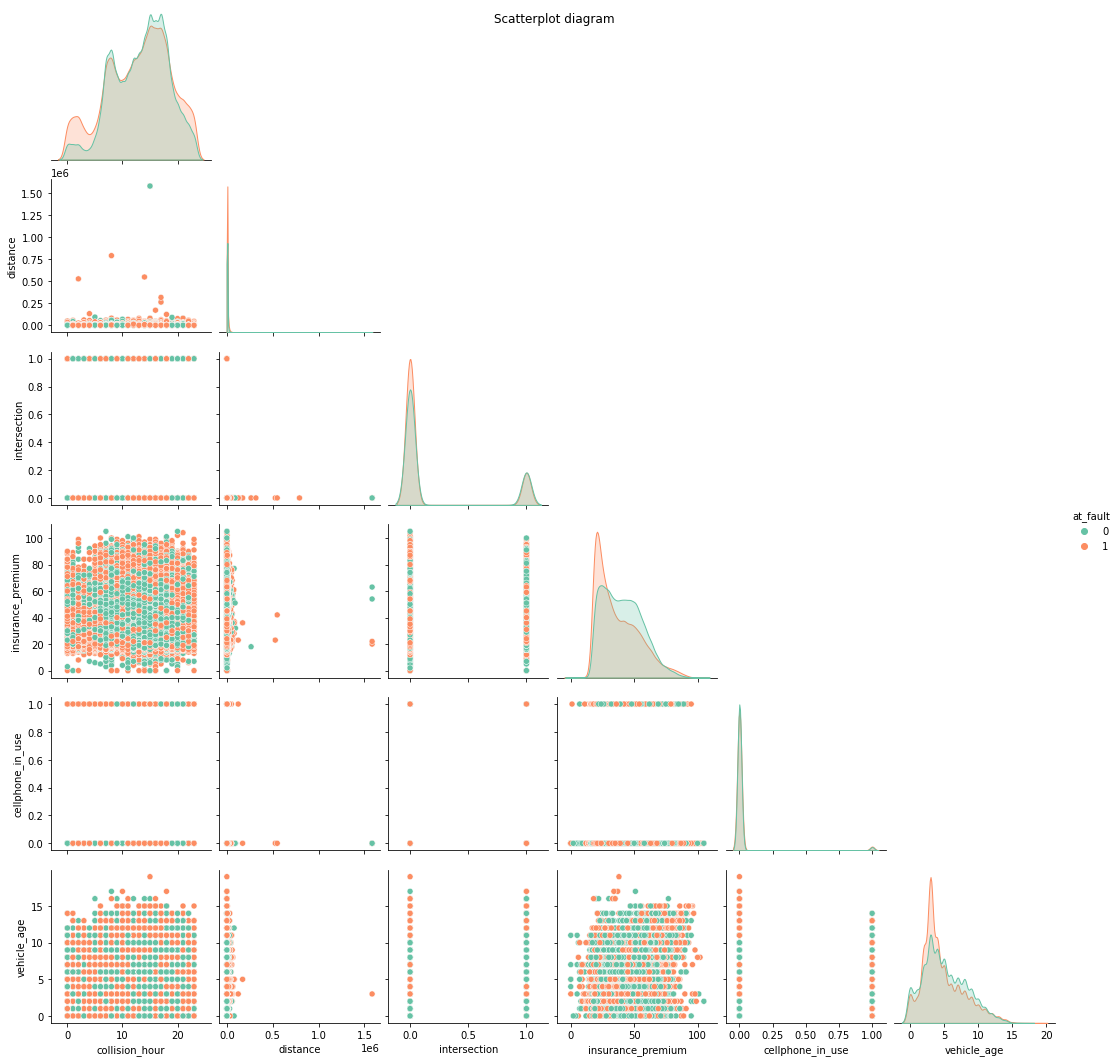

In [36]:
sns.pairplot(df, hue = 'at_fault' ,corner = True, palette = 'Set2')
plt.suptitle("Scatterplot diagram")
plt.show()

**Let's mark the important data exploration points:**
   - We have passes and there are a lot of them. correction suggestions:
        - out of 3 quantitative variables we have omissions in two `insurance_premium` - 10%, `vehicle_age` - 72%
        I propose to enlarge the indicators in the category and add `unknw` for omissions.
        I intentionally don't use options:
            - in the mandatory variable `vehicle_age` we have 72% omissions
            - delete omissions - you will have to throw out too much data
            - padding with the median or mean in the subgroup - since this is, to some extent, fabrication of the data
        - in categorical variables there are omissions in 14 indicators - here you just need to add `unknw`
   - in categorical variables there are 2 indicators with a significant number of unique values:
        - `county_city_location` - 513
        - `county_location` - 58
     if we use OHE to encode them, the model will be unreasonably demanding on computing resources - you need to use Ordinal for them - encoding

CPU times: user 41.3 ms, sys: 5.21 ms, total: 46.5 ms
Wall time: 45 ms


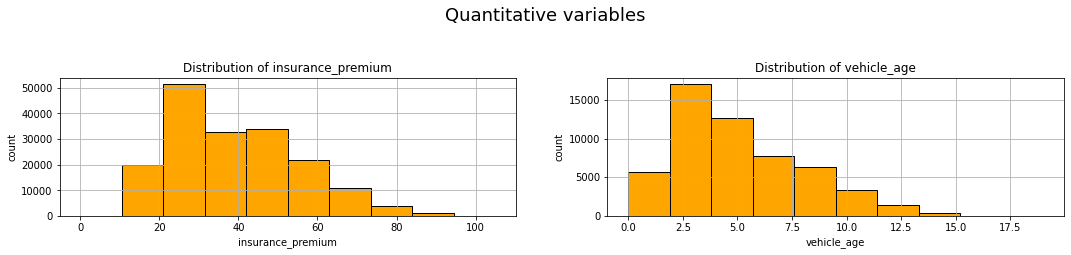

In [37]:
%%time
numerical_cols_1 = ['insurance_premium','vehicle_age']

plt.figure(figsize = (18, 14))
plt.subplots_adjust(hspace = 0.5)
plt.suptitle("Quantitative variables", fontsize = 18, y = 0.95)

for n, ct in enumerate(numerical_cols_1):
    ax = plt.subplot(4, 2, n + 1)
    ax = plt.hist(df[ct], color = 'orange', edgecolor= 'black')
    plt.title(f'Distribution of {ct}')
    plt.xlabel(ct)
    plt.ylabel('count')
    plt.grid(True)

In [38]:
df['vehicle_age_1'] = pd.qcut(df['vehicle_age'], q = 6).astype(str).str.strip('()[]')
df['insurance_premium_1'] = pd.qcut(df['insurance_premium'], q = 6).astype(str).str.strip('()[]')

In [39]:
df['vehicle_age_1'].value_counts()

nan            141008
-0.001, 2.0     11674
2.0, 3.0        10986
4.0, 6.0         9491
8.0, 19.0        7845
6.0, 8.0         7341
3.0, 4.0         7148
Name: vehicle_age_1, dtype: int64

In [40]:
df = df.drop(['vehicle_age','insurance_premium'], axis = 1)

In [41]:
df = df.fillna('unknw')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195493 entries, 0 to 195492
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   collision_hour        195493 non-null  object 
 1   weather_1             195493 non-null  object 
 2   lighting              195493 non-null  object 
 3   direction             195493 non-null  object 
 4   distance              195493 non-null  float64
 5   road_surface          195493 non-null  object 
 6   location_type         195493 non-null  object 
 7   road_condition_1      195493 non-null  object 
 8   control_device        195493 non-null  object 
 9   intersection          195493 non-null  object 
 10  county_city_location  195493 non-null  object 
 11  county_location       195493 non-null  object 
 12  at_fault              195493 non-null  int64  
 13  party_drug_physical   195493 non-null  object 
 14  party_sobriety        195493 non-null  object 
 15  

Next, we prepare the data for training, we produce:
   - scaling of the remaining quantitative attribute `distance`
   - encoding of categorical variables
        - ordinal
        - OHE
    - split the data into train and test

In [42]:
numerical_cols = ['distance']

cat_cols_ordinal = ['county_city_location','county_location']

cat_cols_ohe = df.columns[~df.columns.isin(cat_cols_ordinal)]
cat_cols_ohe = [x for x in cat_cols_ohe if x != 'distance' and x != 'at_fault']

df['intersection'] = df['intersection'].astype(str).str.replace('.0', '', regex = False)
df['collision_hour'] = df['collision_hour'].astype(str).str.replace('.0', '', regex = False)
df['cellphone_in_use'] = df['cellphone_in_use'].astype(str).str.replace('.0', '', regex = False)

In [43]:
df_ready = df.copy()

**Scaling features**

In [44]:
scaler = StandardScaler()

for col in numerical_cols:
    df_ready['sc_' + str(col)] = scaler.fit_transform(df_ready[[col]])

**Ordinal encoding** 

In [45]:
ordinal = OrdinalEncoder()

features_ordin = df_ready[cat_cols_ordinal]
features_ordin = pd.DataFrame(ordinal.fit_transform(features_ordin),
                                   columns = ['ord_' + x for x in cat_cols_ordinal], 
                                   index = features_ordin.index)

df_ready = pd.concat([df_ready, features_ordin], axis=1)

features_ordin.head(3)

,ord_county_city_location,ord_county_location
0,428.0,42.0
1,110.0,18.0
2,245.0,29.0


**OneHotEncoder** 

In [46]:
ohe = OneHotEncoder()

for k in cat_cols_ohe:
    ohe_smpl = ohe.fit_transform(df_ready[k].values.reshape(-1,1)).toarray()
    features_ohe = pd.DataFrame(ohe_smpl, columns = ['ohe_' + k + str(int(i)) for i in range(ohe_smpl.shape[1])])
    df_ready = pd.concat([df_ready, features_ohe], axis=1)

In [47]:
df_ready = df_ready.drop(numerical_cols + cat_cols_ordinal + cat_cols_ohe, axis = 1).copy()

In [48]:
df_ready.isnull().sum().sum()

0

**Split data into train and test**

For trees and random forest

In [49]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(
    df_ready.drop(columns = ['at_fault']), 
    df_ready.at_fault, 
    test_size = 0.3, 
    random_state = 12345)

For boosting

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns = ['at_fault']), 
    df.at_fault, 
    test_size = 0.3, 
    random_state = 12345)

**Conclusion**

***SQL part***
- conducted an express study of the database in SQL and prepared 6 questions on the data (of which 2 tasks were sorted out)
- collected data in one set based on the business task
- selected features that can affect the target feature

***Pandas-EDA-Part***
- studied the data in detail already in Pandas
- processed omissions and removed duplicates
- prepared data for training:
     - carried out scaling of quantitative features
     - coding was done for categorical features
     - split the data into training and test parts

## Training ML models

**ML problem statement**

**Main objective of the project:**

It is necessary to create a system that could assess the risk of an accident along the chosen route.

**Target**

Based on the problem statement, it follows that we will predict the indicator **`at_fault`**

**What type of problem is solved:**

A binary feature is predicted, we solve a classification problem

**Quality metric:**

I propose to optimize **`recall`** on the final model.

The metric shows what proportion of objects of a positive class out of all objects of a positive class was found by the algorithm.

**Rationale for the metric:**

The main task of our model is the prevention and prevention of accidents.

We understand that it is also important not to show messages and not check for **`false-positive`** errors - unnecessary procedures will make drivers nervous and they will go to competitors.

However, there is nothing about churn in the staging, so I suggest optimizing **`recall`** rather than **`precision`**.
Since we are talking about the safety of the life of the driver and pedestrians.

![img](https://habrastorage.org/r/w1560/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png)

**DecisionTree**

In [51]:
model_dtc = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced')

**GridSearchCV** - we need it to search for optimal hyperparameters.

In fact, this is a grid search for different values, the combination where the metric value will be maximum.

In [52]:
param_grid_dtc = { 
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15]
}

In [53]:
%%time
t1 = datetime.datetime.now()

CV_dtc = GridSearchCV(estimator = model_dtc, param_grid = param_grid_dtc, cv = 5, 
                                                  scoring = 'recall')
CV_dtc.fit(X_train_rd, y_train_rd)

print("Best param DTC")
print(CV_dtc.best_params_)

model_dtc.set_params(**CV_dtc.best_params_)

scores_dtc = np.array([])

fold = KFold(n_splits = 5 , shuffle = True, random_state = 12345)

scores_on_this_split = cross_val_score(
            estimator = model_dtc , X = X_train_rd, y = y_train_rd,
            cv = fold, scoring = 'recall')
scores_dtc = np.append(scores_dtc, scores_on_this_split)

t2 = datetime.datetime.now()

time_dtc_cv = round((t2-t1).total_seconds(), 1)

Best param DTC
{'max_depth': 13}
CPU times: user 56.2 s, sys: 2.07 s, total: 58.3 s
Wall time: 58.3 s


In [54]:
print(scores_dtc)

[0.50472259 0.53361726 0.52299889 0.50408192 0.50055571]


Train the model

In [55]:
%%time

t1 = datetime.datetime.now()

model_dtc.fit(X_train_rd, y_train_rd)

t2 = datetime.datetime.now()

time_dtc_fit = round((t2-t1).total_seconds(), 1)

CPU times: user 1.38 s, sys: 9.1 ms, total: 1.39 s
Wall time: 1.39 s


Making a prediction

In [56]:
%%time

t1 = datetime.datetime.now()

predicted_target_test_dtc = model_dtc.predict(X_test_rd)

t2 = datetime.datetime.now()

time_dtc_prd = round((t2-t1).total_seconds(), 1)

CPU times: user 28.2 ms, sys: 9.76 ms, total: 38 ms
Wall time: 36 ms


In [57]:
print("DecisionTree recall_score:", recall_score(y_test, predicted_target_test_dtc))
print("DecisionTree roc_auc_score:", roc_auc_score(y_test, predicted_target_test_dtc))
print("DecisionTree precision_score:", precision_score(y_test, predicted_target_test_dtc))

DecisionTree recall_score: 0.5147029865441418
DecisionTree roc_auc_score: 0.649962750281085
DecisionTree precision_score: 0.7215550954681389


**RandomForest**

In [58]:
model_rfc = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')

In [59]:
param_grid_rfc = { 
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16, 17, 18, 19, 20],
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

In [60]:
%%time

t1 = datetime.datetime.now()

CV_rfc = GridSearchCV(estimator = model_rfc, param_grid = param_grid_rfc, cv = 5, 
                                                  scoring = 'recall')
CV_rfc.fit(X_train_rd, y_train_rd)

print("Best param RFC")
print(CV_rfc.best_params_)

model_rfc.set_params(**CV_rfc.best_params_)

scores_rfc = np.array([])

fold = KFold(n_splits = 5 , shuffle = True, random_state = 12345)

scores_on_this_split = cross_val_score(
            estimator = model_rfc , X = X_train_rd, y = y_train_rd,
            cv = fold, scoring = 'recall')
scores_rfc = np.append(scores_rfc, scores_on_this_split)

t2 = datetime.datetime.now()

time_rfc_cv = round((t2-t1).total_seconds(), 1)

Best param RFC
{'max_depth': 20, 'n_estimators': 3}
CPU times: user 16min 47s, sys: 56.7 s, total: 17min 43s
Wall time: 17min 44s


Train the model

In [61]:
%%time

t1 = datetime.datetime.now()

model_rfc.fit(X_train_rd, y_train_rd)

t2 = datetime.datetime.now()

time_rfc_fit = round((t2-t1).total_seconds(), 1)

CPU times: user 597 ms, sys: 22.4 ms, total: 619 ms
Wall time: 618 ms


Making a prediction

In [62]:
%%time

t1 = datetime.datetime.now()

predicted_target_test_rfc = model_rfc.predict(X_test_rd)

t2 = datetime.datetime.now()

time_rfc_prd = round((t2-t1).total_seconds(), 1)

CPU times: user 57.8 ms, sys: 8.25 ms, total: 66.1 ms
Wall time: 64.7 ms


In [63]:
print("RandomForest recall_score:", recall_score(y_test, predicted_target_test_rfc))
print("RandomForest roc_auc_score:", roc_auc_score(y_test, predicted_target_test_rfc))
print("RandomForest precision_score:", precision_score(y_test, predicted_target_test_rfc))

RandomForest recall_score: 0.5221201181489991
RandomForest roc_auc_score: 0.6370271255802842
RandomForest precision_score: 0.694746495480152


**CatBoost**

In [64]:
cat_bst_features =  cat_cols_ordinal + cat_cols_ohe

In [65]:
model_catbst = CatBoostClassifier(random_state = 12345, 
                                 verbose = False, 
                                 cat_features = cat_bst_features) 

In [66]:
param_grid_catbst = {'learning_rate':[0.1, 0.5, 0.8]}

In [67]:
%%time

t1 = datetime.datetime.now()

CV_catbst = GridSearchCV(estimator = model_catbst, param_grid = param_grid_catbst, cv = 5, 
                                                  scoring = 'recall')
CV_catbst.fit(X_train, y_train)

print("Best param Catbst")
print(CV_catbst.best_params_)

model_catbst.set_params(**CV_catbst.best_params_)

scores_catbst = np.array([])

fold = KFold(n_splits = 5 , shuffle = True, random_state = 12345)

scores_on_this_split = cross_val_score(
            estimator = model_catbst , X = X_train, y = y_train,
            cv = fold, scoring = 'recall')
scores_catbst = np.append(scores_catbst, scores_on_this_split)

t2 = datetime.datetime.now()

time_catbst_cv = round((t2-t1).total_seconds(), 1)

Best param Catbst
{'learning_rate': 0.8}
CPU times: user 5h 53min 47s, sys: 3min 45s, total: 5h 57min 32s
Wall time: 35min 41s


Train the model

In [68]:
%%time

t1 = datetime.datetime.now()

model_catbst.fit(X_train, y_train)

t2 = datetime.datetime.now()

time_catbst_fit = round((t2-t1).total_seconds(), 1)

CPU times: user 22min 51s, sys: 9.71 s, total: 23min
Wall time: 2min 12s


Making a prediction

In [69]:
%%time

t1 = datetime.datetime.now()

predicted_target_test_catbst = model_catbst.predict(X_test)

t2 = datetime.datetime.now()

time_catbst_prd = round((t2-t1).total_seconds(), 1)

CPU times: user 4 s, sys: 72.4 ms, total: 4.07 s
Wall time: 643 ms


In [70]:
print("CatBoost recall_score:", recall_score(y_test, predicted_target_test_catbst))
print("CatBoost roc_auc_score:", roc_auc_score(y_test, predicted_target_test_catbst))
print("CatBoost precision_score:", precision_score(y_test, predicted_target_test_catbst))

CatBoost recall_score: 0.6801115851657368
CatBoost roc_auc_score: 0.7062989610121395
CatBoost precision_score: 0.7332720002830756


**For convenience, we will display the results in a table**

In [71]:
index = ['DecisionTree OHE',
         'RandomForest OHE',
         'CatBoost']

data = {'Recall on CV':[scores_dtc.mean(), scores_rfc.mean(), scores_catbst.mean()],
                           
        'CV train time, sec':[time_dtc_cv, time_rfc_cv, time_catbst_cv],
       
        'Recall on test':[recall_score(y_test, predicted_target_test_dtc), 
                              recall_score(y_test, predicted_target_test_rfc), 
                              recall_score(y_test, predicted_target_test_catbst)],
        
        'Precision on test':[precision_score(y_test, predicted_target_test_dtc), 
                              precision_score(y_test, predicted_target_test_rfc), 
                              precision_score(y_test, predicted_target_test_catbst)],
        
        'Train time, sec':[time_dtc_fit, time_rfc_fit, time_catbst_fit],
        
        'Prediction time, sec':[time_dtc_prd, time_rfc_prd, time_catbst_prd]}

models_result = pd.DataFrame(data=data, index=index)
models_result

,Recall on CV,"CV train time, sec",Recall on test,Precision on test,"Train time, sec","Prediction time, sec"
DecisionTree OHE,0.513195,58.3,0.514703,0.721555,1.4,0.0
RandomForest OHE,0.518025,1064.5,0.522120,0.694746,0.6,0.1
CatBoost,0.662758,2141.5,0.680112,0.733272,133.0,0.6


**Conclusion**
- formulated ML task
- identified the target metric and justified its choice
- Decision Tree, Random Forest and CatBoost
     - carried out the selection of hyperparameters
     - did cross-validation
- Made a prediction on test data for all three models
- The final results were entered into a comparative table

**Best model selection**

By a significant margin in both `recall` and `precision`, CatBoost wins.   
Of the minuses, I can note the significantly higher costs for the calculation time.

## Check out the best model in the works

Now let's take a closer look at our best model.

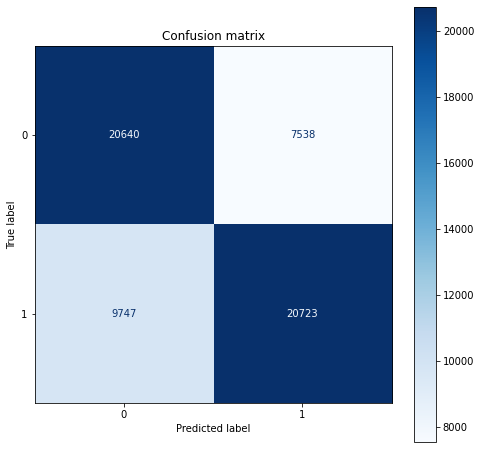

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model_catbst, X_test, y_test, cmap = plt.cm.Blues, ax = ax)
plt.title('Confusion matrix')
plt.show()

- 21083 **True Negative (TN)** - accident - no, forecast - no
- 6836 **False Positive (FP)** - accident - no, forecast - yes
- 9987 **False Negative (FN)** - accident - yes, forecast - no
- 20742 **True Positive (TP)** - accident - yes, forecast - yes

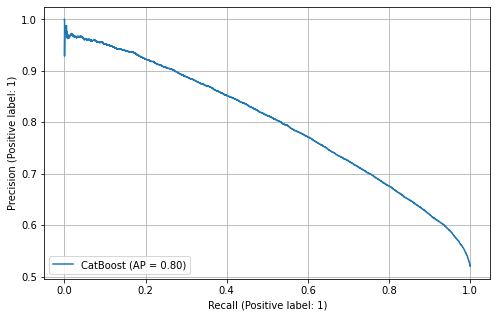

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_precision_recall_curve(model_catbst, X_test, y_test, name = 'CatBoost', ax=ax)
plt.grid(True)
plt.show()

Next, let's see the importance of features on the trained model

In [74]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(8,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')
    plt.grid(True)

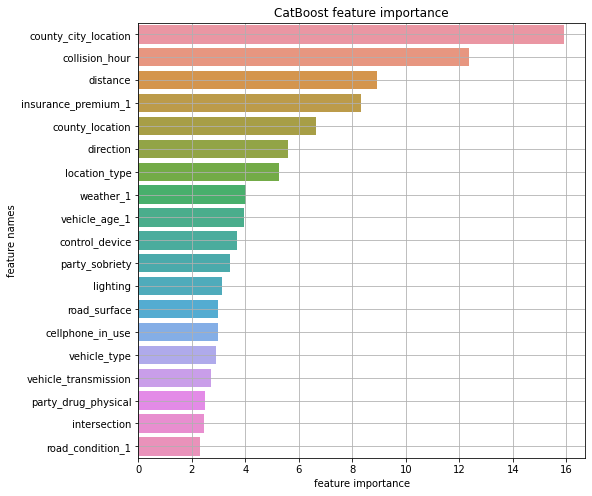

In [75]:
plot_feature_importance(model_catbst.get_feature_importance(), X_train.columns,'CatBoost')

We see that in addition to the factors characterizing the route itself and the location
The list of important factors includes factors characterizing the driver's condition.
TOP 5 important features:
- `county_city_location` - control at the order stage, the physical location of the car
- `collision_hour` - control at the order stage, also a physical property
- `party_sobriety` - driver state validation required at order start stage
- `distance` - control at the order stage, the physical location of the machine
- `insurance_premium` - control at the order stage, this property can be viewed in the table with customer data. is mandatory when renting / car sharing a car

`party_sobriety` we have already looked at the stage of SQL queries, so it is more interesting to look at `insurance_premium`

In [76]:
df.groupby('insurance_premium_1', as_index = False).agg(fault_sum = ('at_fault', 'sum'),
                                                        all_cnt = ('at_fault', 'count'))

,insurance_premium_1,fault_sum,all_cnt
0,"-0.001, 22.0",20523,31537
1,"22.0, 28.0",15205,28097
2,"28.0, 36.0",13424,28864
3,"36.0, 46.0",13182,31431
4,"46.0, 56.0",11458,28297
5,"56.0, 105.0",12718,27620
6,nan,15818,19647


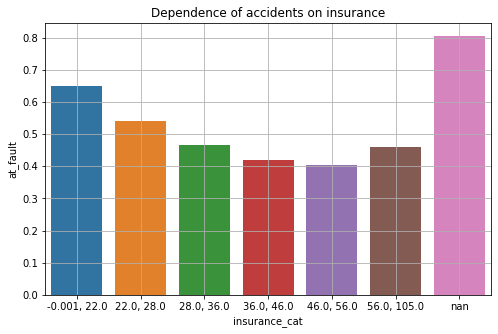

In [77]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['insurance_premium_1'].sort_values(), y = df['at_fault'], ci=None)
plt.title('Dependence of accidents on insurance')
plt.xlabel('insurance_cat')
plt.ylabel('at_fault')
plt.grid(True)
plt.show()

The graph shows that people are most often involved in accidents:
   - with minimal insurance
   - people whose sum insured data is not available
  
It is interesting to see what kind of damage occurs during accidents in the `unknw` group

In [78]:
query = '''

select  
    b.at_fault,
    b.insurance_premium, 
    a.collision_damage,
    count(a.case_id) as cnt

from collisions a

inner join parties b
  on a.case_id = b.case_id
   and b.party_type = 'car'
   and b.at_fault = 1
   
left join vehicles c
  on b.case_id = c.case_id
    and b.party_number = c.party_number
  
where 1=1
  and extract(year from a.collision_date) = '2012'
  and a.collision_damage != 'scratch'
  and b.insurance_premium is null

group by     b.at_fault,
    b.insurance_premium,
    a.collision_damage
 '''
sample_df = pd.read_sql_query(query, con=engine) 
sample_df.head(50)

,at_fault,insurance_premium,collision_damage,cnt
0,1,None,fatal,45
1,1,None,middle damage,812
2,1,None,severe damage,143
3,1,None,small damage,15339


**Conclusion:**

- in this point of the study, we looked at the best model:
     - built an error matrix and a PR curve
     - assessed the importance of features
     - considered in detail the impact of insurance on accidents
 
**Recommendation for taking into account the factor and improving the service:**

- We see that people with a minimum sum insured and people with an empty insurance field are often involved in road accidents
- We also know that there are approximately 10% of users without completed insurance in the initial sample
- Such clients are predominantly in minor accidents

We can assume that these are clients:
- with expired insurance and not renewing it. At the same time, these customers used the service before.
   The data transfer lag from the insurance to the rental service allows this group of customers to use the service
- this is a client who provided false information about insurance (looks less believable because there are a lot of them)

To improve work with insurances, it is necessary to find out in which insurance the last policy was registered for the clients of this group, and if there is a clear "leader" in terms of validation delay, work with it to optimize and speed up the synchronization process.

## Overview of the best model

In [79]:
print("CatBoost recall_score:", recall_score(y_test, predicted_target_test_catbst))
print("CatBoost roc_auc_score:", roc_auc_score(y_test, predicted_target_test_catbst))
print("CatBoost precision_score:", precision_score(y_test, predicted_target_test_catbst))

CatBoost recall_score: 0.6801115851657368
CatBoost roc_auc_score: 0.7062989610121395
CatBoost precision_score: 0.7332720002830756


Based on the results of the study, we chose the model - **`CatBoost`** with the learning_rate parameter - **0.5**.

This is a machine learning model that uses gradient boosting.

The task of recommending the best route, as well as preventing accidents, is quite important both from a business point of view (reducing costs) and from a moral and ethical point of view (prevention of victims).

In our model, it was possible to achieve the following indicators:
   - `recall` - 67% - this means that the model predicted 67% of real accidents (with the culprit of the accident - the service client)
   - `precision` - 75% - this means that out of the whole set of whom the model considered the culprit of the accident, 75% are correctly marked, those 25% of users will receive a request or warning that is irrelevant to them.
  
It seems to me that this is a very good result for piloting such a service in real conditions.

It is very important to solve this problem:
- *to build a model*
   - collected and systematized retrostatistics
- *for industrial operation*
   - speed of data exchange with contractors (insurers)
   - updating weather/road condition guides in real time
 
 
What else needs to be added:
- in the project we had nothing about the driver, it seems to me that this can be very important information:
     - social dem. criteria
     - history of driving experience in expanded form (including past accidents)
     - history of using the service
          - frequency of trips
          - used tariffs
          - geography
          - duration of trips, etc.

## General сonclusion

In this project, a model was created to assess the risk of an accident along a selected route.

The project included the following stages:
  - primary study of tables
      - database connection
      - a brief overview of the tables available in the database (reconciliation of their contents with the business condition)
  - statistical analysis of accident factors
      - writing SQL queries to the customer's database
      - quantitative data analysis
      - preparation of questions for a meeting with colleagues (solution of 2 tasks from this list)
  - preparing data for the driving risk assessment model
      - collection of dataset for model training
      - selection of characters involved in the simulation (with justification for the choice)
      - work with duplicates and passes
      - scaling of quantitative and coding of categorical features
      - split into train and test parts
  - training and search for the best model
      - based on the requirements of the customer, we formulated an ML task
         - set target and target metrics
      - Decision Tree, Random Forest and CatBoost models were trained
         - carried out the selection of hyperparameters
         - did cross-validation
         - carried out a prediction for all three models
         - compared the models by the quality of the target metric
  - performance evaluation of the best model
     - built an error matrix and a PR curve
     - assessed the importance of features
     - considered in detail the impact of insurance on accidents

  - made recommendations for further improvement of the model
 
**Final model** - CatBoost:
   - `learning_rate` - 0.5
   - `recall` - 67%
   - `precision` - 75%